#📌 Extracción

In [1]:
import pandas as pd
import requests

# Bajamos los datos de la URL directamente
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
response = requests.get(url)
data_json = response.json()

#🔧 Transformación

In [20]:
# Normalizamos el JSON crudo, Esto expandirá automáticamente todas las llaves anidadas
datos_clientes = pd.json_normalize(data_json, sep='_')
pd.set_option('display.max_columns', None)
datos_clientes.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [21]:
# Análisis de nulos y duplicados
print(f"Registros totalmente duplicados: {datos_clientes.duplicated().sum()}")

# Conversión de datos numéricos y tratamiento de nulos, Convertimos a numérico (los errores se vuelven NaN)
datos_clientes['account_Charges_Total'] = pd.to_numeric(datos_clientes['account_Charges_Total'], errors='coerce')
print(f"Valores vacíos antes de fillna: {datos_clientes['account_Charges_Total'].isnull().sum()}")
# Llenamos con 0 los valores nulos creados por coerce o que ya venían vacíos
datos_clientes['account_Charges_Total'] = datos_clientes['account_Charges_Total'].fillna(0)
print(f"Valores vacíos después de fillna: {datos_clientes['account_Charges_Total'].isnull().sum()}")


Registros totalmente duplicados: 0
Valores vacíos antes de fillna: 11
Valores vacíos después de fillna: 0


In [4]:
# Reviso valores únicos en columnas categóricas clave
columnas_interes = ['Churn', 'customer_gender', 'internet_InternetService', 'account_Contract']

for col in columnas_interes:
    if col in datos_clientes.columns:
        print(f"\nDistribución en {col}:")
        print(datos_clientes[col].value_counts())
    else:
        print(f"\nLa columna {col} no se encuentra en el dataset.")


Distribución en Churn:
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

Distribución en customer_gender:
customer_gender
Male      3675
Female    3592
Name: count, dtype: int64

Distribución en internet_InternetService:
internet_InternetService
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64

Distribución en account_Contract:
account_Contract
Month-to-month    4005
Two year          1743
One year          1519
Name: count, dtype: int64


In [22]:
# Información general del DataFrame limpio
print("-" * 30)
datos_clientes.info()

------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupp

In [6]:
#Manejamos inconsistencias.
# Lista de columnas que son texto
columnas_texto = [
    'customer_gender', 'customer_Partner', 'customer_Dependents',
    'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
    'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection',
    'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies',
    'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'Churn'
]

In [7]:
# Aplicar lower() y strip() masivamente para eliminar espacios en blanco y estandariza a minúsculas
for col in columnas_texto:
    if col in datos_clientes.columns:
        datos_clientes[col] = datos_clientes[col].str.lower().str.strip()

datos_clientes.head(10)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,no,female,0,yes,yes,9,yes,no,dsl,no,yes,no,yes,yes,no,one year,yes,mailed check,65.60,593.30
1,0003-MKNFE,no,male,0,no,no,9,yes,yes,dsl,no,no,no,no,no,yes,month-to-month,no,mailed check,59.90,542.40
2,0004-TLHLJ,yes,male,0,no,no,4,yes,no,fiber optic,no,no,yes,no,no,no,month-to-month,yes,electronic check,73.90,280.85
3,0011-IGKFF,yes,male,1,yes,no,13,yes,no,fiber optic,no,yes,yes,no,yes,yes,month-to-month,yes,electronic check,98.00,1237.85
4,0013-EXCHZ,yes,female,1,yes,no,3,yes,no,fiber optic,no,no,no,yes,yes,no,month-to-month,yes,mailed check,83.90,267.40
5,0013-MHZWF,no,female,0,no,yes,9,yes,no,dsl,no,no,no,yes,yes,yes,month-to-month,yes,credit card (automatic),69.40,571.45
6,0013-SMEOE,no,female,1,yes,no,71,yes,no,fiber optic,yes,yes,yes,yes,yes,yes,two year,yes,bank transfer (automatic),109.70,7904.25
7,0014-BMAQU,no,male,0,yes,no,63,yes,yes,fiber optic,yes,no,no,yes,no,no,two year,yes,credit card (automatic),84.65,5377.80
8,0015-UOCOJ,no,female,1,no,no,7,yes,no,dsl,yes,no,no,no,no,no,month-to-month,yes,electronic check,48.20,340.35
9,0016-QLJIS,no,female,0,yes,yes,65,yes,yes,dsl,yes,yes,yes,yes,yes,yes,two year,yes,mailed check,90.45,5957.90


In [8]:
columnas_interes = ['Churn', 'customer_gender', 'internet_InternetService', 'account_Contract']

print("Valores únicos por columna:")
for col in columnas_interes:
    if col in datos_clientes.columns:
        # Usamos .unique() para ver los valores sin repetir
        valores_unicos = datos_clientes[col].unique()
        print(f"\nColumna {col}:")
        print(valores_unicos)
    else:
        print(f"\nLa columna {col} no se encuentra en el dataset.")



Valores únicos por columna:

Columna Churn:
['no' 'yes' '']

Columna customer_gender:
['female' 'male']

Columna internet_InternetService:
['dsl' 'fiber optic' 'no']

Columna account_Contract:
['one year' 'month-to-month' 'two year']


In [9]:
# Crear la columna Cuentas_Diarias, Divido el cargo mensual por 30
datos_clientes['Cuentas_Diarias'] = datos_clientes['account_Charges_Monthly'] / 30

# Redondeo a 2 decimales
datos_clientes['Cuentas_Diarias'] = datos_clientes['Cuentas_Diarias'].round(2)

# Verifico las primeras filas para las columnas relacionadas a cargos
columnas_chequeo = ['account_Charges_Monthly', 'Cuentas_Diarias', 'account_Charges_Total']
print(datos_clientes[columnas_chequeo].head(10))

   account_Charges_Monthly  Cuentas_Diarias  account_Charges_Total
0                    65.60             2.19                 593.30
1                    59.90             2.00                 542.40
2                    73.90             2.46                 280.85
3                    98.00             3.27                1237.85
4                    83.90             2.80                 267.40
5                    69.40             2.31                 571.45
6                   109.70             3.66                7904.25
7                    84.65             2.82                5377.80
8                    48.20             1.61                 340.35
9                    90.45             3.02                5957.90


In [10]:
datos_clientes.head(5)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Cuentas_Diarias
0,0002-ORFBO,no,female,0,yes,yes,9,yes,no,dsl,no,yes,no,yes,yes,no,one year,yes,mailed check,65.6,593.30,2.19
1,0003-MKNFE,no,male,0,no,no,9,yes,yes,dsl,no,no,no,no,no,yes,month-to-month,no,mailed check,59.9,542.40,2.00
2,0004-TLHLJ,yes,male,0,no,no,4,yes,no,fiber optic,no,no,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85,2.46
3,0011-IGKFF,yes,male,1,yes,no,13,yes,no,fiber optic,no,yes,yes,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,yes,female,1,yes,no,3,yes,no,fiber optic,no,no,no,yes,yes,no,month-to-month,yes,mailed check,83.9,267.40,2.80


In [11]:
#Reemplazamos los valores yes a 1 y no a 0.
datos_clientes = datos_clientes.replace({'yes': 1, 'no': 0})
datos_clientes.head(5)


/tmp/ipython-input-600967880.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos_clientes = datos_clientes.replace({'yes': 1, 'no': 0})


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Cuentas_Diarias
0,0002-ORFBO,0,female,0,1,1,9,1,0,dsl,0,1,0,1,1,0,one year,1,mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,male,0,0,0,9,1,1,dsl,0,0,0,0,0,1,month-to-month,0,mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,male,0,0,0,4,1,0,fiber optic,0,0,1,0,0,0,month-to-month,1,electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,male,1,1,0,13,1,0,fiber optic,0,1,1,0,1,1,month-to-month,1,electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,female,1,1,0,3,1,0,fiber optic,0,0,0,1,1,0,month-to-month,1,mailed check,83.9,267.40,2.80


#📊 Carga y análisis

In [12]:
# Seleccionamos las columnas que son montos o tiempo
columnas_numericas = ['customer_tenure', 'account_Charges_Monthly', 'account_Charges_Total','Cuentas_Diarias']

# Calculamos las métricas
analisis_numerico = datos_clientes[columnas_numericas].describe().T
analisis_numerico

#tenure: meses de contrato del cliente
#Charges.Monthly: total de todos los servicios del cliente por mes
#Charges.Total: total gastado por el cliente
#Cuentas diarias: Utiliza la facturacion mensual para calular el valor diario



,count,mean,std,min,25%,50%,75%,max
customer_tenure,7267.0,32.346498,24.571773,0.00,9.000,29.00,55.000,72.00
account_Charges_Monthly,7267.0,64.720098,30.129572,18.25,35.425,70.30,89.875,118.75
account_Charges_Total,7267.0,2277.182035,2268.648587,0.00,396.200,1389.20,3778.525,8684.80
Cuentas_Diarias,7267.0,2.157292,1.004407,0.61,1.180,2.34,2.995,3.96


In [13]:
print(datos_clientes['Churn'].value_counts())

Churn
0    5174
1    1869
      224
Name: count, dtype: int64


/tmp/ipython-input-3901208469.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos_clientes['Churn'] = datos_clientes['Churn'].replace('', np.nan).fillna(0).astype(int)


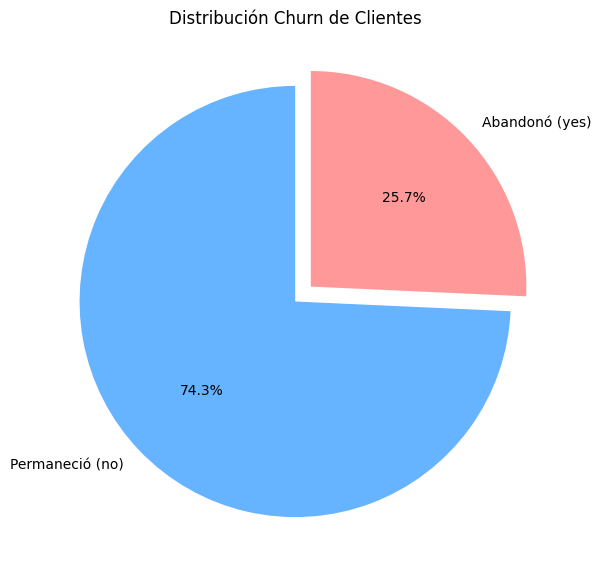

In [14]:
#Grafico porcentaje de cliente que se quedan o abandonan.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Primero reemplazamos los textos vacíos por NaN, y luego esos NaN por 0
datos_clientes['Churn'] = datos_clientes['Churn'].replace('', np.nan).fillna(0).astype(int)

# Cuento
churn_counts = datos_clientes['Churn'].value_counts().sort_index()

# Creo el gráfico de pastel
plt.figure(figsize=(7, 7))
plt.pie(churn_counts,
        labels=['Permaneció (no)', 'Abandonó (yes)'],
        autopct='%1.1f%%',
        startangle=90,
        colors=['#66b3ff','#ff9999'],
        explode=(0, 0.1))

plt.title('Distribución Churn de Clientes')
plt.show();

In [15]:
# Reviso Churn por Tipo de Contrato
contrato_churn = pd.crosstab(datos_clientes['account_Contract'], datos_clientes['Churn'], normalize='index') * 100
print("Porcentaje de Churn por Tipo de Contrato:")
contrato_churn

Porcentaje de Churn por Tipo de Contrato:


Churn,0,1
account_Contract,,
month-to-month,58.676654,41.323346
one year,89.071758,10.928242
two year,97.246127,2.753873


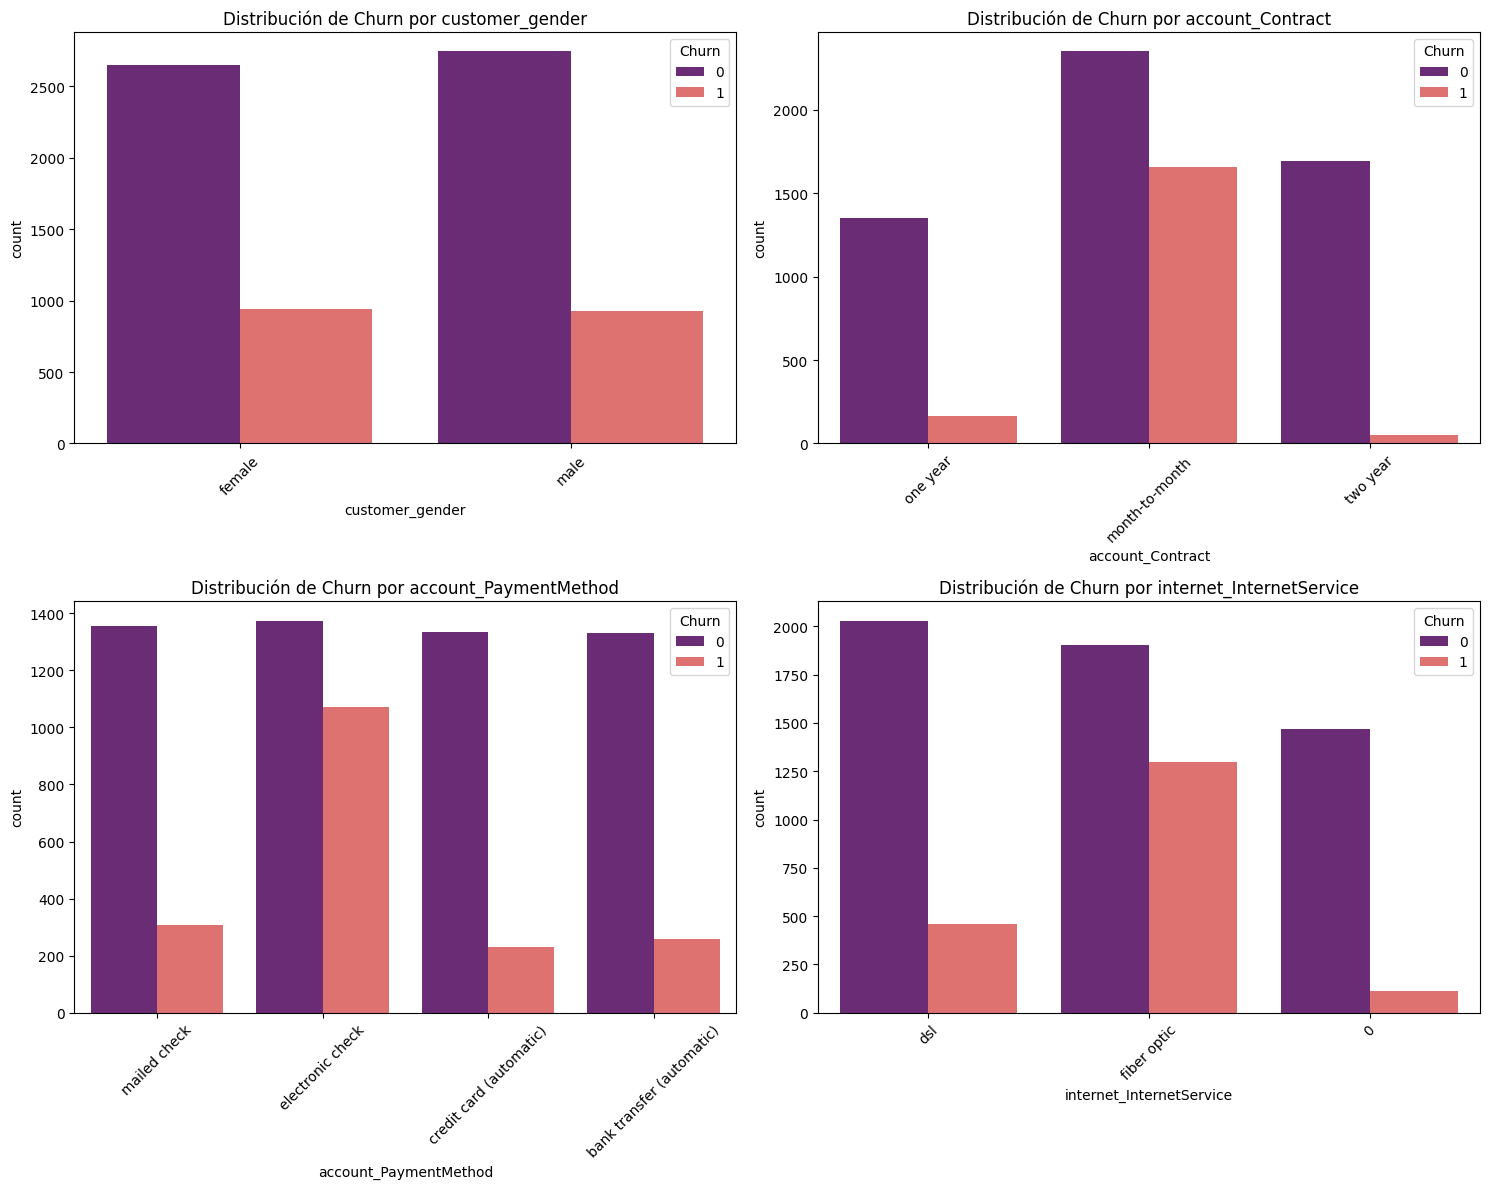

In [16]:
#Genero graficos de barras con las 4 categorias que me parecen mas interesantes de analizar.
import seaborn as sns
import matplotlib.pyplot as plt

# Columnas
variables_cat = ['customer_gender', 'account_Contract', 'account_PaymentMethod', 'internet_InternetService']

plt.figure(figsize=(15, 12))

for i, col in enumerate(variables_cat):
    plt.subplot(2, 2, i+1)
    # Gráfico agrupado por Churn
    sns.countplot(data=datos_clientes, x=col, hue='Churn', palette='magma')
    plt.title(f'Distribución de Churn por {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

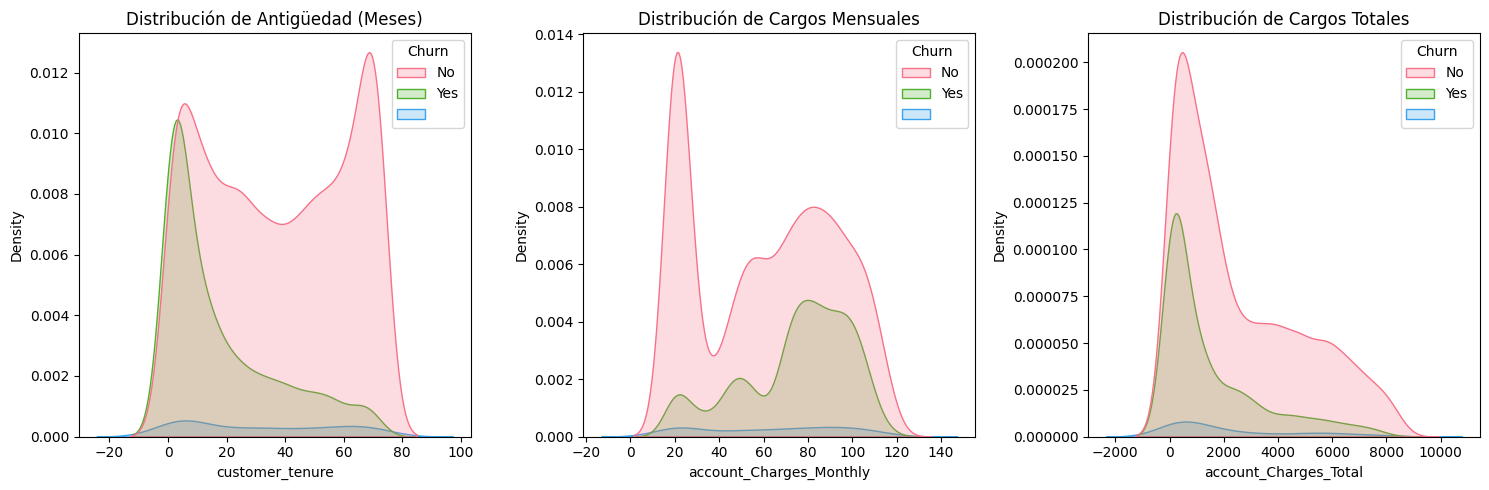

In [23]:
#Genero gráfico seaborn para mejor visualización de cantidades
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

# Antiguedad
plt.subplot(1, 3, 1)
sns.kdeplot(data=datos_clientes, x='customer_tenure', hue='Churn', fill=True, palette='husl')
plt.title('Distribución de Antigüedad (Meses)')

# Cargos Mensuales
plt.subplot(1, 3, 2)
sns.kdeplot(data=datos_clientes, x='account_Charges_Monthly', hue='Churn', fill=True, palette='husl')
plt.title('Distribución de Cargos Mensuales')

# Cargos Totales
plt.subplot(1, 3, 3)
sns.kdeplot(data=datos_clientes, x='account_Charges_Total', hue='Churn', fill=True, palette='husl')
plt.title('Distribución de Cargos Totales')

plt.tight_layout()
plt.show()

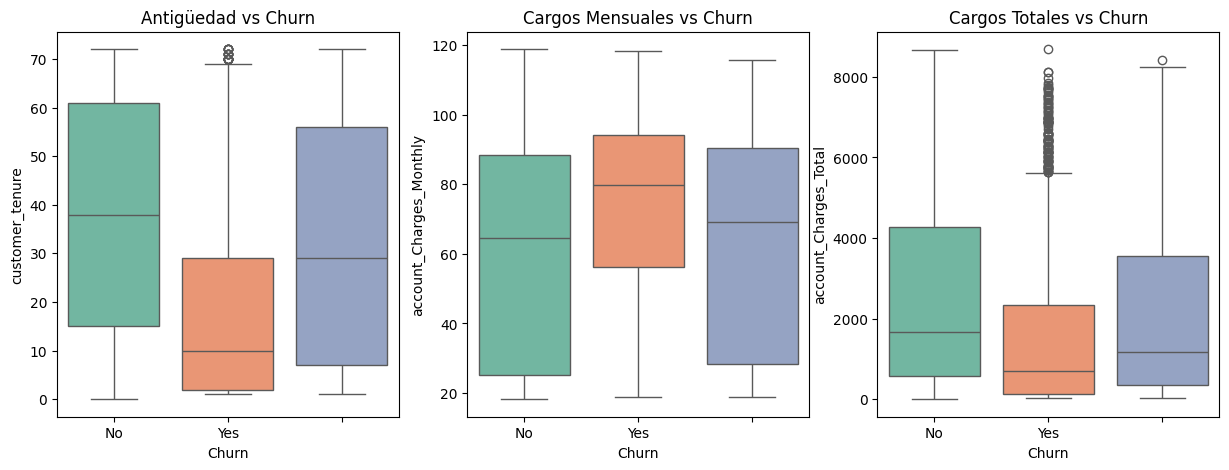

In [24]:
#Boxplot para evaluar de mejor manera las medianas o valores que se escapen.
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='Churn', y='customer_tenure', data=datos_clientes, palette='Set2',hue='Churn',legend=False)
plt.title('Antigüedad vs Churn')

plt.subplot(1, 3, 2)
sns.boxplot(x='Churn', y='account_Charges_Monthly', data=datos_clientes, palette='Set2',hue='Churn',legend=False)
plt.title('Cargos Mensuales vs Churn')

plt.subplot(1, 3, 3)
sns.boxplot(x='Churn', y='account_Charges_Total', data=datos_clientes, palette='Set2',hue='Churn',legend=False)
plt.title('Cargos Totales vs Churn')

plt.show();

#📄Informe final

#Informe Final: Análisis de Evasión de Clientes - TelecomX1.

##Introducción
El objetivo de este análisis es identificar los factores críticos que influyen en la pérdida de clientes de la empresa TelecomX. La evasión o Churn representa uno de los mayores desafíos en la industria de las telecomunicaciones, ya que retener a un cliente existente es significativamente más económico que adquirir uno nuevo.
Este estudio busca proporcionar insights basados en datos para reducir dicha tasa.

##Limpieza y Tratamiento de Datos
Para garantizar la calidad de los resultados, se realizaron los siguientes pasos técnicos:

Importación: Se consumieron los datos directamente desde una API/URL en formato JSON anidado.

Normalización: Se transformaron las estructuras de diccionarios internos (customer, phone, account) en columnas individuales mediante pd.json_normalize.

Manejo de Nulos y Tipos: * Se identificaron y corrigieron campos vacíos ('') en Churn y Total Charges.Se convirtieron variables categóricas ("yes"/"no") a formato binario ($0$ y $1$) para permitir cálculos estadísticos.Se forzó el tipo numérico en columnas financieras que venían como texto.

##Análisis Exploratorio de Datos (EDA)
Durante la exploración, se detectaron los siguientes patrones mediante visualizaciones:

Distribución General: La tasa de abandono se sitúa en aproximadamente un 26%, lo que indica una oportunidad de mejora urgente.

Segmentación por Contrato: Los clientes con contratos mes a mes presentan una propensión al abandono drásticamente superior a los contratos de uno o dos años.

Comportamiento Numérico: * Los clientes nuevos (0-5 meses de antigüedad) son el segmento más volátil.Existe una correlación visual entre cargos mensuales elevados y una mayor probabilidad de cancelación.

##Conclusiones e Insights
La tasa de abandono es exactamente del 25.7%, por ende el porcentaje de retención es un 74.3%.

Tio de Contrato: El gráfico nos indica que el contrato "month-to-month" no solo tiene más Cancelación de Clientes, sino que la cantidad de abandonos es casi igual a la de permanencia en ese segmento. Es, por lejos, el factor de riesgo número uno.

Método de Pago: Se observa claramente que el "Electronic check" tiene una tasa de evasión desproporcionadamente alta en comparación con los demás métodos.

No se aprecian diferencias medibles relativo a género, por lo que no sería un factor importante a considerar para los efectos de este informe.

El factor tiempo es clave: La lealtad se construye después del primer año; el riesgo de fuga es crítico durante el "onboarding".

Barrera de precio: Las facturas mensuales que superan el promedio del segmento suelen preceder a una cancelación.

Impacto tecnológico: El servicios de internet de fibra óptica en algunos segmentos, muestran un número alto de cancelaciones, es importante analizar la razón, esto podría sugerir problemas de soporte técnico o falta de precios competitivos.

##Recomendaciones Estratégicas

Incentivar la Permanencia: Crear promociones o descuentos para migrar a los clientes de contratos "mes a mes" hacia planes anuales.

Programa de Retención Temprana: Implementar una campaña de seguimiento intensivo para clientes en sus primeros 3 a 6 meses.

Optimización de Pagos: Promover el uso de pagos automáticos (tarjeta de crédito/banco) frente a cheques electrónicos, ya que estos últimos muestran mayores tasas de mora y deserción.

Alerta de Cargos Altos: Establecer un sistema de banderas rojas para clientes cuya factura mensual aumente repentinamente, ofreciendo una revisión proactiva de su plan.